In [31]:
# Importing necessary modules

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

In [3]:
# Importing the given data

dataset = pd.read_csv(r'C:\Users\shaih\OneDrive\Desktop\Home\Home\Programming\Codecademy\Life-Expectancy-and-GDP-Starter\Life-Expectancy-and-GDP-Starter\all_data.csv')
dataset

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [4]:
# Rename column for ease of access

dataset_modified = dataset.copy()
dataset_modified.rename(columns = {"Life expectancy at birth (years)": "Life Expectancy"}, inplace = True)
dataset_modified

,Country,Year,Life Expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [5]:
# Displaying which countries are present in the dataset

dataset_modified["Country"].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

Text(0, 0.5, 'Life Expectancy in Years')

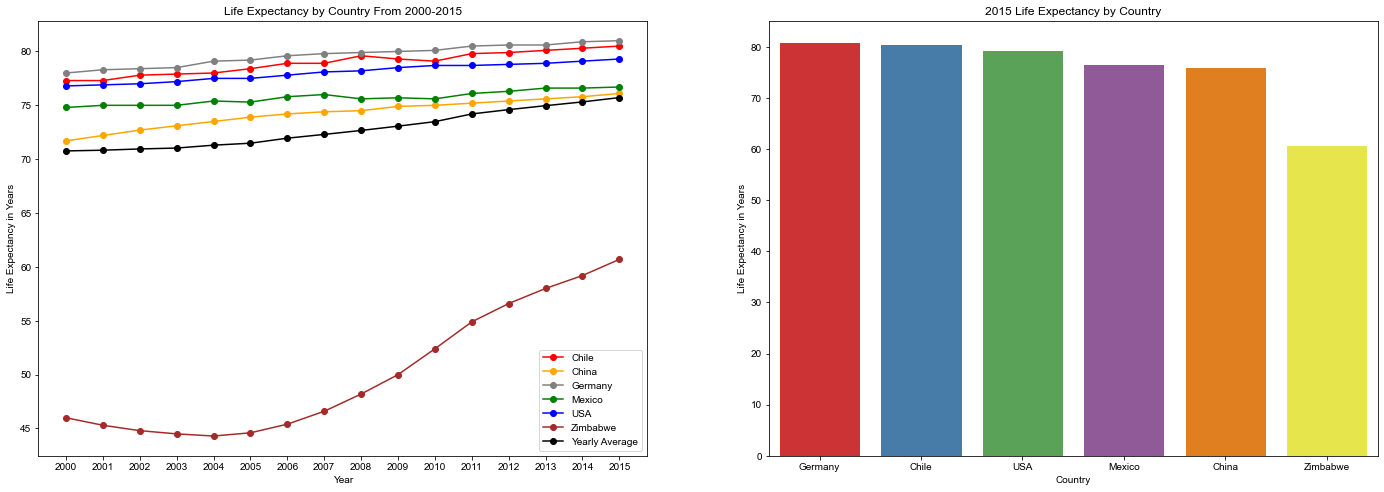

In [6]:
# Assessing the different life expectancies between countries over the years

fig = plt.figure(figsize = (24, 8))

ax1 = plt.subplot(1, 2, 1)

year_le_mean = dataset_modified.groupby(["Year"])["Life Expectancy"].mean().reset_index()

ax1.plot("Year", "Life Expectancy", data = dataset_modified[dataset_modified["Country"] == "Chile"], label = "Chile", color = "red", marker = "o")
ax1.plot("Year", "Life Expectancy", data = dataset_modified[dataset_modified["Country"] == "China"], label = "China", color = "orange", marker = "o")
ax1.plot("Year", "Life Expectancy", data = dataset_modified[dataset_modified["Country"] == "Germany"], label = "Germany", color = "gray", marker = "o")
ax1.plot("Year", "Life Expectancy", data = dataset_modified[dataset_modified["Country"] == "Mexico"], label = "Mexico", color = "green", marker = "o")
ax1.plot("Year", "Life Expectancy", data = dataset_modified[dataset_modified["Country"] == "United States of America"], label = "USA", color = "blue", marker = "o")
ax1.plot("Year", "Life Expectancy", data = dataset_modified[dataset_modified["Country"] == "Zimbabwe"], label = "Zimbabwe", color = "brown", marker = "o")
ax1.plot("Year", "Life Expectancy", data = year_le_mean, label = "Yearly Average", color = "black", marker = "o")

ax1.set_title("Life Expectancy by Country From 2000-2015")
ax1.legend()
ax1.set_xlabel("Year")
ax1.set_ylabel("Life Expectancy in Years")

ax1.set_xticks(range(2000, 2016))
ax1.set_xticklabels(range(2000, 2016))


ax2 = plt.subplot(1, 2, 2)
sns.set_palette("Set1")
sns.set_style("ticks")

countries_le_2015 = dataset_modified[("Life Expectancy")][dataset_modified["Year"] == 2015].reset_index()
countries_le_2015["Country"] = ["Chile", "China", "Germany", "Mexico", "USA", "Zimbabwe"]
countries_le_2015_sorted = countries_le_2015.sort_values(by = "Life Expectancy", ascending = False)

sns.barplot(data = countries_le_2015_sorted, x = "Country", y = "Life Expectancy")

ax2.set_title("2015 Life Expectancy by Country")
ax2.set_ylabel("Life Expectancy in Years")


[Text(0, 5000000000, '0'),
 Text(0, 2005000000000, '2'),
 Text(0, 4005000000000, '4'),
 Text(0, 6005000000000, '6'),
 Text(0, 8005000000000, '8'),
 Text(0, 10005000000000, '10'),
 Text(0, 12005000000000, '12'),
 Text(0, 14005000000000, '14'),
 Text(0, 16005000000000, '16'),
 Text(0, 18005000000000, '18')]

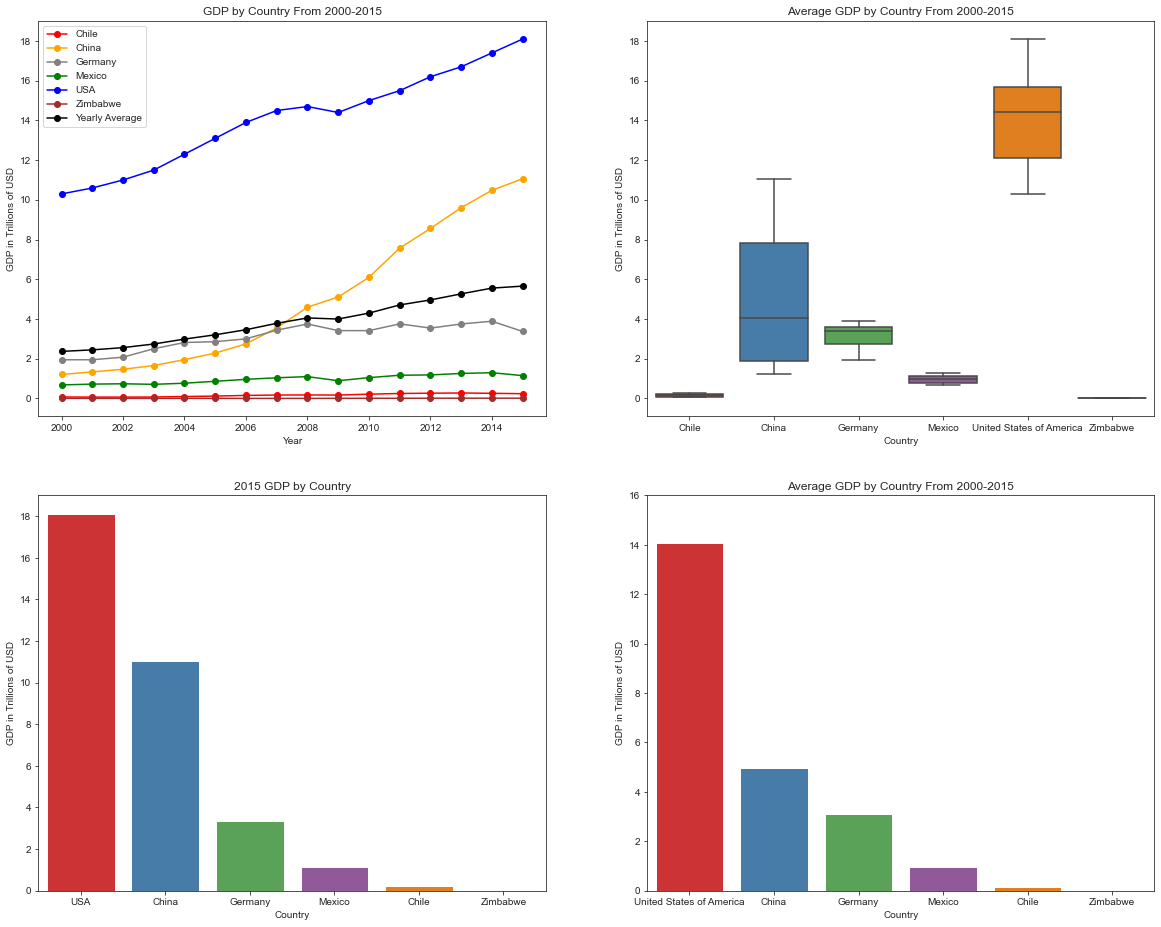

In [7]:
# Assessing the GDPs of each country over the years

fig = plt.figure(figsize = (20, 16))

ax1 = plt.subplot(2, 2, 1)

year_gdp_mean = dataset_modified.groupby(["Year"])["GDP"].mean().reset_index()

plt.plot("Year", "GDP", data = dataset_modified[dataset_modified["Country"] == "Chile"], label = "Chile", color = "red", marker = "o")
plt.plot("Year", "GDP", data = dataset_modified[dataset_modified["Country"] == "China"], label = "China", color = "orange", marker = "o")
plt.plot("Year", "GDP", data = dataset_modified[dataset_modified["Country"] == "Germany"], label = "Germany", color = "gray", marker = "o")
plt.plot("Year", "GDP", data = dataset_modified[dataset_modified["Country"] == "Mexico"], label = "Mexico", color = "green", marker = "o")
plt.plot("Year", "GDP", data = dataset_modified[dataset_modified["Country"] == "United States of America"], label = "USA", color = "blue", marker = "o")
plt.plot("Year", "GDP", data = dataset_modified[dataset_modified["Country"] == "Zimbabwe"], label = "Zimbabwe", color = "brown", marker = "o")
plt.plot("Year", "GDP", data = year_gdp_mean, label = "Yearly Average", color = "black", marker = "o")

ax1.set_title("GDP by Country From 2000-2015")
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP in Trillions of USD")
ax1.legend()

ax1.set_yticks(range(5000000000, 20000000000000, 2000000000000))
ax1.set_yticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])


ax2 = plt.subplot(2, 2, 4)

countries_gdp_mean = dataset_modified.groupby(["Country"])["GDP"].mean().reset_index()
countries_gdp_mean_sorted = countries_gdp_mean.sort_values(by = "GDP", ascending = False)

sns.barplot(data = countries_gdp_mean_sorted, x = "Country", y = "GDP")

ax2.set_title("Average GDP by Country From 2000-2015")
ax2.set_ylabel("GDP in Trillions of USD")

ax2.set_yticks(range(5000000000, 18000000000000, 2000000000000))
ax2.set_yticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16])


ax3 = plt.subplot(2, 2, 2)

sns.boxplot(data = dataset_modified, x = "Country", y = "GDP")

ax3.set_title("Average GDP by Country From 2000-2015")
ax3.set_ylabel("GDP in Trillions of USD")

ax3.set_yticks(range(5000000000, 20000000000000, 2000000000000))
ax3.set_yticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])


ax4 = plt.subplot(2, 2, 3)

countries_gdp_2015 = dataset_modified[("GDP")][dataset_modified["Year"] == 2015].reset_index()
countries_gdp_2015["Country"] = ["Chile", "China", "Germany", "Mexico", "USA", "Zimbabwe"]
countries_gdp_2015_sorted = countries_gdp_2015.sort_values(by = "GDP", ascending = False)

sns.barplot(data = countries_gdp_2015_sorted, x = "Country", y = "GDP")

ax4.set_title("2015 GDP by Country")
ax4.set_ylabel("GDP in Trillions of USD")

ax4.set_yticks(range(5000000000, 20000000000000, 2000000000000))
ax4.set_yticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])

[Text(5000000000, 0, '0'),
 Text(2005000000000, 0, '2'),
 Text(4005000000000, 0, '4'),
 Text(6005000000000, 0, '6'),
 Text(8005000000000, 0, '8'),
 Text(10005000000000, 0, '10'),
 Text(12005000000000, 0, '12'),
 Text(14005000000000, 0, '14'),
 Text(16005000000000, 0, '16'),
 Text(18005000000000, 0, '18')]

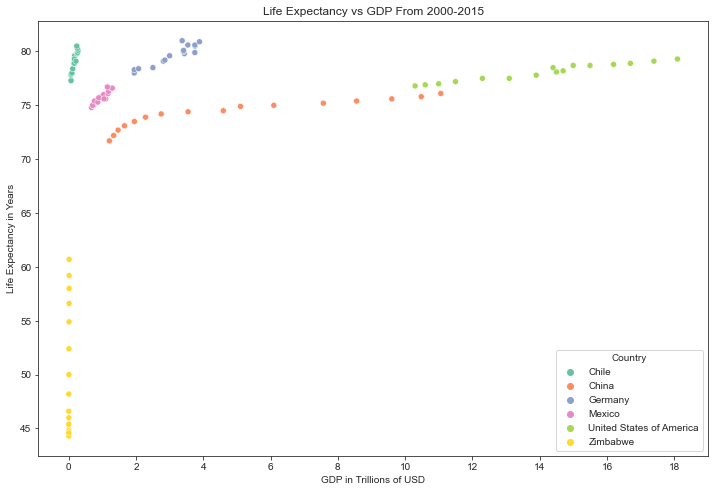

In [8]:
# Investigating the relationship between GDP and life expectancy

fig = plt.figure(figsize = (12, 8))

ax = plt.subplot()
sns.set_palette("Set2")
sns.set_style("white")

sns.scatterplot(data = dataset_modified, x = "GDP", y = "Life Expectancy", hue = "Country")

ax.set_title("Life Expectancy vs GDP From 2000-2015")
ax.set_xlabel("GDP in Trillions of USD")
ax.set_ylabel("Life Expectancy in Years")

ax.set_xticks(range(5000000000, 20000000000000, 2000000000000))
ax.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])


[Text(0, 45, '45'), Text(0, 50, '50'), Text(0, 55, '55'), Text(0, 60, '60')]

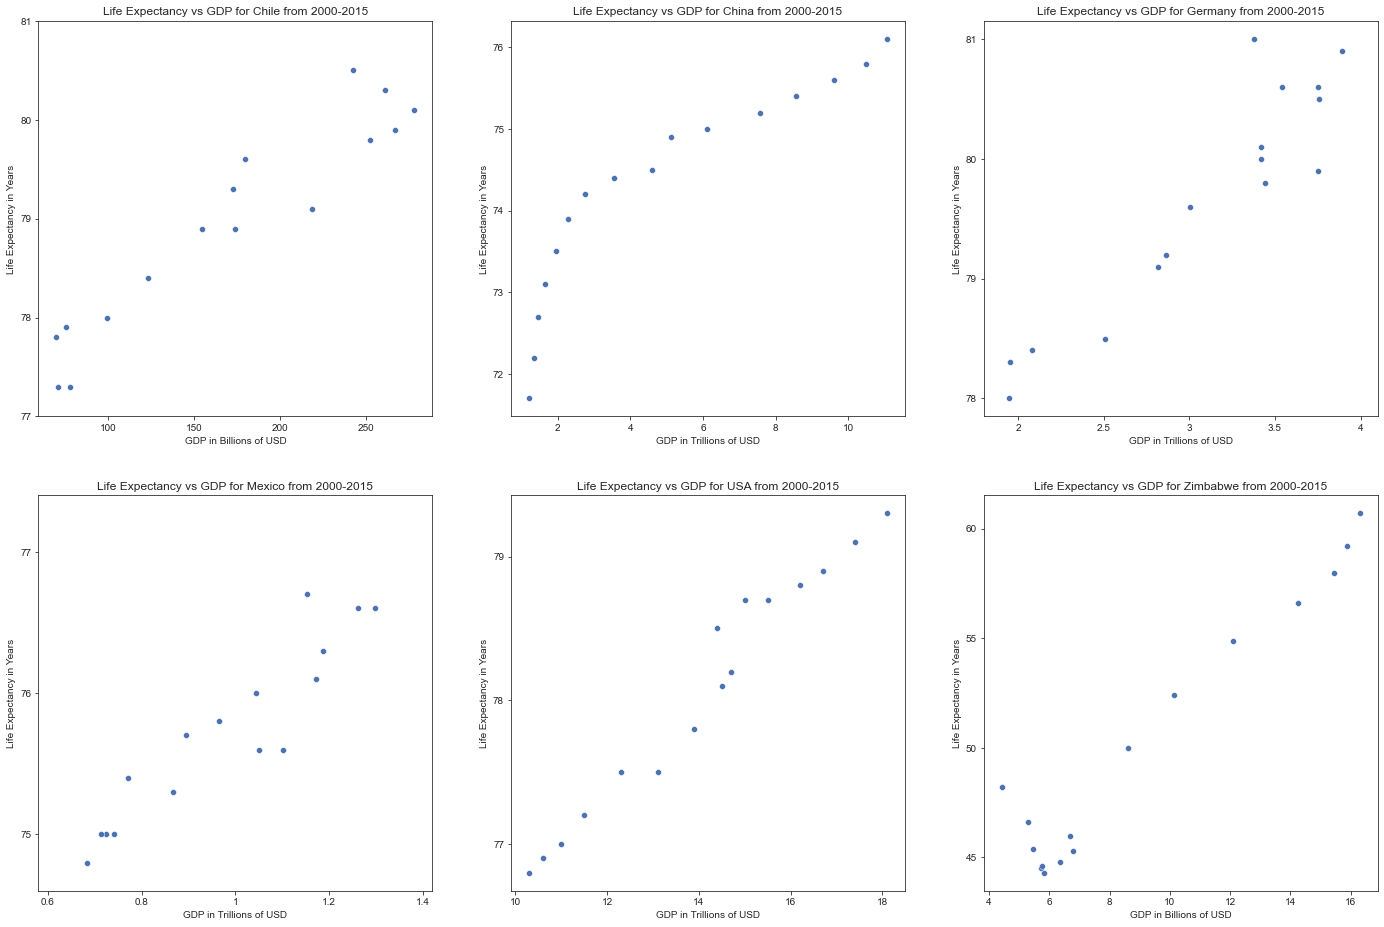

In [21]:
# Investigating the relationship between GDP and life expectancy for individual countries

fig = plt.figure(figsize = (24, 16))
sns.set_palette("deep")
sns.set_style("ticks")

ax1 = plt.subplot(2, 3, 1)

sns.scatterplot(data = dataset_modified[dataset_modified["Country"] == "Chile"], x = "GDP", y = "Life Expectancy")

ax1.set_title("Life Expectancy vs GDP for Chile from 2000-2015")
ax1.set_xlabel("GDP in Billions of USD")
ax1.set_ylabel("Life Expectancy in Years")

ax1.set_xticks(range(100000000000, 260000000000, 50000000000))
ax1.set_xticklabels([100, 150, 200, 250])
ax1.set_yticks(range(77, 82, 1))
ax1.set_yticklabels([77, 78, 79, 80, 81])


ax2 = plt.subplot(2, 3, 2)

sns.scatterplot(data = dataset_modified[dataset_modified["Country"] == "China"], x = "GDP", y = "Life Expectancy")

ax2.set_title("Life Expectancy vs GDP for China from 2000-2015")
ax2.set_xlabel("GDP in Trillions of USD")
ax2.set_ylabel("Life Expectancy in Years")

ax2.set_xticks(range(2000000000000, 11000000000000, 2000000000000))
ax2.set_xticklabels([2, 4, 6, 8, 10])


ax3 = plt.subplot(2, 3, 3)

sns.scatterplot(data = dataset_modified[dataset_modified["Country"] == "Germany"], x = "GDP", y = "Life Expectancy")

ax3.set_title("Life Expectancy vs GDP for Germany from 2000-2015")
ax3.set_xlabel("GDP in Trillions of USD")
ax3.set_ylabel("Life Expectancy in Years")

ax3.set_xticks(range(2000000000000, 4100000000000, 500000000000))
ax3.set_xticklabels([2, 2.5, 3, 3.5, 4])
ax3.set_xlim(1800000000000, 4100000000000)
ax3.set_yticks(range(78, 82))
ax3.set_yticklabels([78, 79, 80, 81])


ax4 = plt.subplot(2, 3, 4)

sns.scatterplot(data = dataset_modified[dataset_modified["Country"] == "Mexico"], x = "GDP", y = "Life Expectancy")

ax4.set_title("Life Expectancy vs GDP for Mexico from 2000-2015")
ax4.set_xlabel("GDP in Trillions of USD")
ax4.set_ylabel("Life Expectancy in Years")

ax4.set_xticks(range(600000000000,1500000000000, 200000000000))
ax4.set_xticklabels([0.6, 0.8, 1, 1.2, 1.4])
ax4.set_xlim(580000000000, 1420000000000)
ax4.set_yticks(range(75, 78))
ax4.set_yticklabels(range(75, 78))
ax4.set_ylim(74.6, 77.4)


ax5 = plt.subplot(2, 3, 5)

sns.scatterplot(data = dataset_modified[dataset_modified["Country"] == "United States of America"], x = "GDP", y = "Life Expectancy")

ax5.set_title("Life Expectancy vs GDP for USA from 2000-2015")
ax5.set_xlabel("GDP in Trillions of USD")
ax5.set_ylabel("Life Expectancy in Years")

ax5.set_xticks(range(10000000000000, 19000000000000, 2000000000000))
ax5.set_xticklabels([10, 12, 14, 16, 18])
ax5.set_yticks(range(77, 80))
ax5.set_yticklabels(range(77, 80))


ax6 = plt.subplot(2, 3, 6)

sns.scatterplot(data = dataset_modified[dataset_modified["Country"] == "Zimbabwe"], x = "GDP", y = "Life Expectancy")

ax6.set_title("Life Expectancy vs GDP for Zimbabwe from 2000-2015")
ax6.set_xlabel("GDP in Billions of USD")
ax6.set_ylabel("Life Expectancy in Years")

ax6.set_xticks(range(4000000000, 17000000000, 2000000000))
ax6.set_xticklabels([4, 6, 8, 10, 12, 14, 16])
ax6.set_yticks(range(45, 61, 5))
ax6.set_yticklabels(range(45, 61, 5))

In [30]:
# Testing statistical significance of difference in life expectancies between developed and developing countries

developed_countries = ["Chile", "Germany", "United States of America"]

dataset_modified["Developed?"] = dataset_modified["Country"].apply(lambda x: "Yes" if x in (developed_countries) else "No")

developed_le = dataset_modified["Life Expectancy"][dataset_modified["Developed?"] == "Yes"]
developing_le = dataset_modified["Life Expectancy"][dataset_modified["Developed?"] == "No"]
tstat, pval = ttest_ind(developed_le, developing_le)
pval

9.455087776581945e-10

In [34]:
# Testing correlation between GDP and life expectancy

dataset_modified_countries = list(dataset_modified["Country"].unique())

for country in dataset_modified_countries:
    corr_gdp_le, p = pearsonr(dataset_modified["GDP"][dataset_modified["Country"] == country], dataset_modified["Life Expectancy"][dataset_modified["Country"] == country])
    print(f"The pearson correlation coefficient for {country}'s GDP and Life Expectancy is {round(corr_gdp_le, 4)}")

The pearson correlation coefficient for Chile's GDP and Life Expectancy is 0.9499
The pearson correlation coefficient for China's GDP and Life Expectancy is 0.9085
The pearson correlation coefficient for Germany's GDP and Life Expectancy is 0.9327
The pearson correlation coefficient for Mexico's GDP and Life Expectancy is 0.9322
The pearson correlation coefficient for United States of America's GDP and Life Expectancy is 0.9817
The pearson correlation coefficient for Zimbabwe's GDP and Life Expectancy is 0.9662


# Findings

The given dataset provides records on 6 different countries' GDPs and life expectancies each year from 2000 until 2015. 

These 6 countries are:
- Chile
- China
- Germany
- Mexico
- United States of America
- Zimbabwe

By plotting each countries' life expectancy (LE) from 2000-2015, we can see that each country's LE has increased over this period. Although most countries have experienced slow growth in this department, Zimbabwe's LE has risen by a huge 32% over this period. Though, this can be attributed to Zimbabwe's severely low LE values, which dipped as low as 44.3 in 2004, the country has shown significant growth over the last decade and currently has a life expectancy of 60.7 years. Contrastingly, the other 5 countries' LE values have not dipped below 70 at any point during this period, and continue to gradually grow.

Next, let's look at each country's GDP over this period.

Looking at the visualisations, we can clearly see that the USA's GDP is significantly larger than the other countries for each year shown. However, we can see that over the last decade, China's growth has surpassed even the USA's. There isn't much more of note regarding GDP, with the remaining countries' GDPs slowly increasing.

After assessing each variable, we can look at the relationship between the two by plotting them against each other using a scatter plot.

After visualising this plot, we can see that a higher GDP is associated with a higher life expectancy. However, this particular plot makes it hard to draw any significant conclusions due to the differing scales of the data.

To amend this problem, I've plotted the relationship between each variable for each country on a separate plot.

After inspecting each country's plot, we can see that there's a relatively-strong, positive relationship between GDP and life expectancy for every plot. By inspecting the Pearson Correlation Coefficient for each of these individual plots, we can confirm that there is a strong, positive, linear relationship between GDP and life expectancy for each country.

From these findings, we can conclude that GDP plays a significant role in the life expectancy of people born in a certain country. Although there are a multitude of factors that can affect a country's average life expectancy, if the GDP of that particular grows, the life expectancy will likely follow.